In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn openpyxl

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [6]:
# Încarcăm setul de date
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx'
df = pd.read_excel(url)

In [8]:
# Afișăm primele rânduri pentru a înțelege structura datelor
print(df.head())

   No  X1 transaction date  X2 house age  \
0   1          2012.916667          32.0   
1   2          2012.916667          19.5   
2   3          2013.583333          13.3   
3   4          2013.500000          13.3   
4   5          2012.833333           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

In [10]:
# Verificăm informațiile de bază despre date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [12]:
# Verificăm dacă există valori lipsă
print(df.isnull().sum())

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


In [14]:
# Tratăm valorile lipsă (dacă există) prin înlocuirea acestora cu media coloanei
df = df.fillna(df.mean())

In [16]:
# Analiza statistică a datelor
print(df.describe())

               No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148953     17.712560   
std    119.655756             0.281995     11.392485   
min      1.000000          2012.666667      0.000000   
25%    104.250000          2012.916667      9.025000   
50%    207.500000          2013.166667     16.100000   
75%    310.750000          2013.416667     28.150000   
max    414.000000          2013.583333     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 number of convenience stores  X5 latitude  

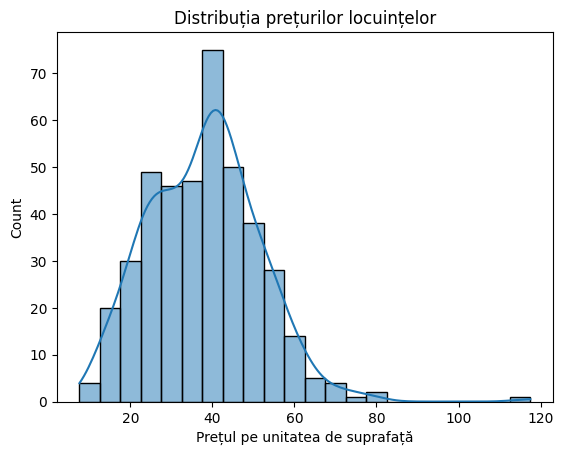

In [18]:
# Vizualizarea distribuției variabilei țintă (prețul locuinței)
sns.histplot(df['Y house price of unit area'], kde=True)
plt.title('Distribuția prețurilor locuințelor')
plt.xlabel('Prețul pe unitatea de suprafață')
plt.show()

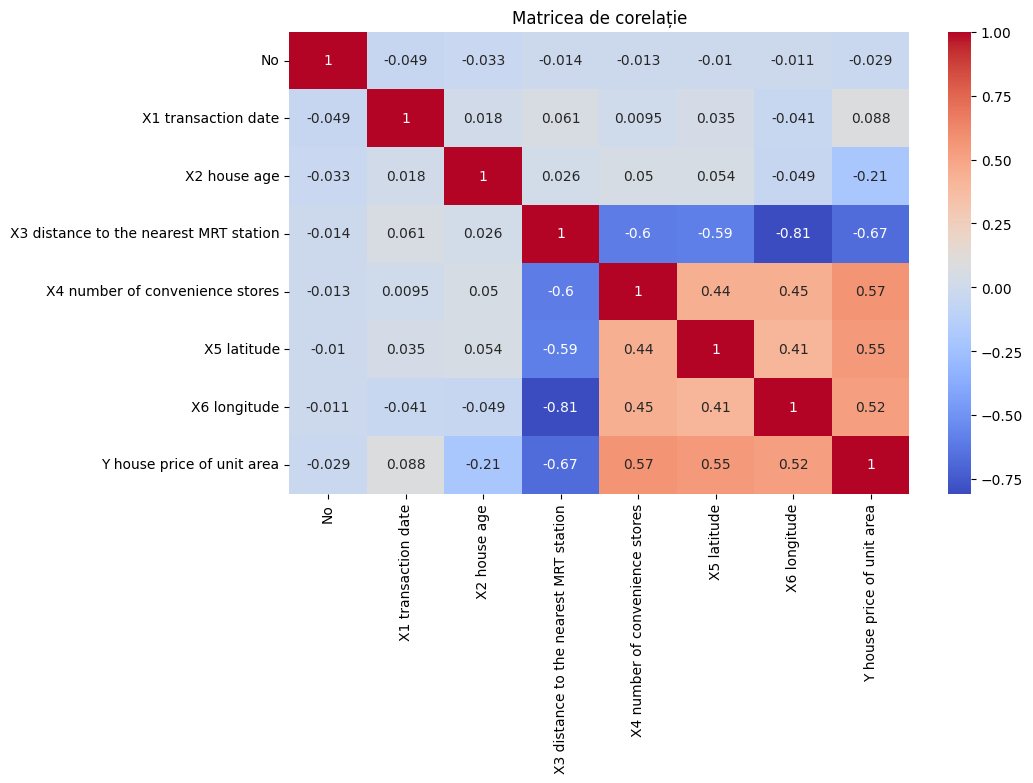

In [20]:
# Corelația dintre variabile
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matricea de corelație')
plt.show()

In [22]:
# Preprocesarea datelor
# Eliminăm coloana 'No' deoarece nu este relevantă pentru predicție
df = df.drop(columns=['No'])

In [24]:
# Separăm variabilele independente de variabila dependentă
X = df.drop(columns=['Y house price of unit area'])
y = df['Y house price of unit area']

In [26]:
# Normalizarea datelor
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [28]:
# Împărțim datele în seturi de antrenament și testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Construim și evaluăm modelele de regresie
models = {
    'Regresie Liniară': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f'Model: {name}')
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'Mean Absolute Error: {mae:.2f}')
    print(f'R2 Score: {r2:.2f}')
    print('-' * 30)

Model: Regresie Liniară
Mean Squared Error: 53.50
Mean Absolute Error: 5.31
R2 Score: 0.68
------------------------------
Model: Lasso Regression
Mean Squared Error: 55.80
Mean Absolute Error: 5.64
R2 Score: 0.67
------------------------------
Model: Ridge Regression
Mean Squared Error: 53.44
Mean Absolute Error: 5.30
R2 Score: 0.68
------------------------------
Model: Random Forest
Mean Squared Error: 32.30
Mean Absolute Error: 3.94
R2 Score: 0.81
------------------------------
Model: Gradient Boosting
Mean Squared Error: 34.25
Mean Absolute Error: 3.92
R2 Score: 0.80
------------------------------


In [34]:
# Interpretarea coeficienților modelului de regresie liniară
coefficients = pd.DataFrame({'Feature': df.drop(columns=['Y house price of unit area']).columns, 'Coefficient': models['Regresie Liniară'].coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)

                                  Feature  Coefficient
3         X4 number of convenience stores     3.211105
4                             X5 latitude     2.839109
0                     X1 transaction date     1.533120
5                            X6 longitude    -0.452247
1                            X2 house age    -3.081292
2  X3 distance to the nearest MRT station    -5.998722
